In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('D:/shinj/Data/[4]pima-Indians/diabetes.csv')
print(train['Outcome'].value_counts())
train.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
features = train.columns.difference(['Outcome'])
label = 'Outcome'

X = train[features]
y = train[label]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state=156, stratify = y)

In [7]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [8]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [9]:
lr_clf.predict_proba(X_test)

array([[0.97821393, 0.02178607],
       [0.79163351, 0.20836649],
       [0.84504686, 0.15495314],
       [0.50582233, 0.49417767],
       [0.95476251, 0.04523749],
       [0.41163779, 0.58836221],
       [0.25591245, 0.74408755],
       [0.79616386, 0.20383614],
       [0.84894684, 0.15105316],
       [0.84439469, 0.15560531],
       [0.32174708, 0.67825292],
       [0.50119451, 0.49880549],
       [0.93443136, 0.06556864],
       [0.5895431 , 0.4104569 ],
       [0.78918197, 0.21081803],
       [0.87854231, 0.12145769],
       [0.24615126, 0.75384874],
       [0.59347426, 0.40652574],
       [0.96413863, 0.03586137],
       [0.21493629, 0.78506371],
       [0.53766112, 0.46233888],
       [0.69851447, 0.30148553],
       [0.93184793, 0.06815207],
       [0.6602242 , 0.3397758 ],
       [0.65651309, 0.34348691],
       [0.88829606, 0.11170394],
       [0.08231568, 0.91768432],
       [0.34439139, 0.65560861],
       [0.82960986, 0.17039014],
       [0.18822251, 0.81177749],
       [0.

In [10]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
pred_proba

array([0.02178607, 0.20836649, 0.15495314, 0.49417767, 0.04523749,
       0.58836221, 0.74408755, 0.20383614, 0.15105316, 0.15560531,
       0.67825292, 0.49880549, 0.06556864, 0.4104569 , 0.21081803,
       0.12145769, 0.75384874, 0.40652574, 0.03586137, 0.78506371,
       0.46233888, 0.30148553, 0.06815207, 0.3397758 , 0.34348691,
       0.11170394, 0.91768432, 0.65560861, 0.17039014, 0.81177749,
       0.20078014, 0.20550253, 0.13987624, 0.23133881, 0.15173245,
       0.70462575, 0.2789981 , 0.68430554, 0.80784373, 0.60811832,
       0.40817598, 0.33911443, 0.650391  , 0.25119424, 0.31266626,
       0.04205008, 0.76024421, 0.13036166, 0.48977821, 0.29485386,
       0.34285617, 0.82618814, 0.8477096 , 0.08554855, 0.1587861 ,
       0.31511163, 0.0999358 , 0.36651742, 0.39401159, 0.40913932,
       0.22741679, 0.73448043, 0.3685721 , 0.55664244, 0.23901557,
       0.10303248, 0.19944277, 0.71107571, 0.1651959 , 0.67847107,
       0.08482858, 0.3579383 , 0.14397549, 0.4623414 , 0.67455

### 평가지표 함수

In [11]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    print(confusion)
    print('정확도:{0: .4f}, 정밀도:{1: .4f}, 재현율:{2: .4f}),F1:{3: .4f},AUC:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741),F1: 0.6392,AUC: 0.7919


### precision_recall_curve_plot 함수

In [13]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

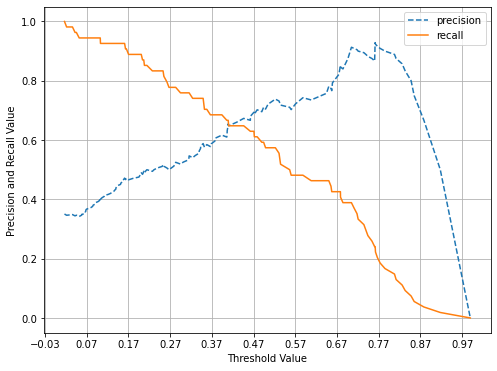

In [23]:
precision_recall_curve_plot(y_test, pred_proba)

###### 이상데이터 처리
###### 데이터 수 부족 -> 0으로 대체

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

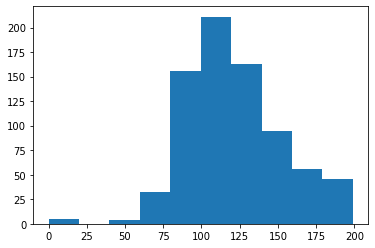

In [15]:
plt.hist(train['Glucose'], bins=10)

In [18]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = train['Glucose'].count()

for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0건수는 5, 퍼센트는 0.65 %
BloodPressure 0건수는 35, 퍼센트는 4.56 %
SkinThickness 0건수는 227, 퍼센트는 29.56 %
Insulin 0건수는 374, 퍼센트는 48.70 %
BMI 0건수는 11, 퍼센트는 1.43 %


In [19]:
mean_zero_features = train[zero_features].mean()

In [20]:
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [21]:
train[zero_features] = train[zero_features].replace(0, mean_zero_features)

In [22]:
for features in zero_features:
    zero_count = train[train[features] == 0][features].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(features, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [24]:
features = train.columns.difference(['Outcome'])
label = 'Outcome'

X = train[features]
y = train[label]

### scale

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7
0,1.425995,0.167255,-0.021044,0.468492,0.865276,-0.417768,0.639947,0.872057
1,-0.190672,-0.851535,-0.516583,-0.365061,-1.205989,-0.417768,-0.844885,0.248678
2,-0.105584,-1.331821,-0.681762,0.604397,2.015979,-0.417768,1.233880,-0.630654
3,-1.041549,-0.633222,-0.516583,-0.920763,-1.074480,-0.265107,-0.844885,-0.374700
4,-0.020496,1.549899,-2.663916,5.484909,0.503626,0.530423,-1.141852,0.872057
...,...,...,...,...,...,...,...,...
763,2.532136,0.065376,0.309315,-0.908682,-0.679954,0.659428,1.827813,2.222711
764,-0.531023,0.632988,-0.186224,-0.398282,0.010468,-0.417768,-0.547919,0.040885
765,-0.275760,-0.909751,-0.021044,-0.685193,-0.022409,-0.071599,0.342981,-0.374700
766,1.170732,-0.342140,-1.012121,-0.371101,0.141977,-0.417768,-0.844885,-0.630654


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

In [38]:
lr_reg = LogisticRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
pred_proba = lr_reg.predict_proba(X_test)

get_clf_eval(y_test, pred, pred_proba[:, 1])

오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111),F1: 0.6804,AUC: 0.8433


In [42]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ',custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [43]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_reg.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값:  0.3
오차행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963),F1: 0.6615,AUC: 0.8433
임계값:  0.33
오차행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778),F1: 0.6774,AUC: 0.8433
임계값:  0.36
오차행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222),F1: 0.6667,AUC: 0.8433
임계값:  0.39
오차행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037),F1: 0.6667,AUC: 0.8433
임계값:  0.42
오차행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667),F1: 0.6792,AUC: 0.8433
임계값:  0.45
오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667),F1: 0.6857,AUC: 0.8433
임계값:  0.48
오차행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481),F1: 0.6931,AUC: 0.8433
임계값:  0.5
오차행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111),F1: 0.6804,AUC: 0.8433


In [46]:
binarizer = Binarizer(threshold=0.45)

In [48]:
pred_th_045 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_045, pred_proba[:, 1])

오차행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667),F1: 0.6857,AUC: 0.8433
